# Analyzing spectrum of mains frequency with Arduino UNO 

To use the analog digital converter from Arduino UNO it is necessary to decrease the 230 V~ to an appropiate range:

"Reads the value from the specified analog pin. The Arduino board contains a 6 channel (8 channels on the Mini and Nano, 16 on the Mega), 10-bit analog to digital converter. This means that it will map input voltages between 0 and 5 volts into integer values between 0 and 1023. This yields a resolution between readings of: 5 volts / 1024 units or, .0049 volts (4.9 mV) per unit. " (source: https://www.arduino.cc/en/Reference/AnalogRead)

Therefore, a power adapter transforms 230 V~ to 17 V~ and a voltage divider and an additional 5 V DC supply convert the voltage in a range between 0...5 V (see picture below).    

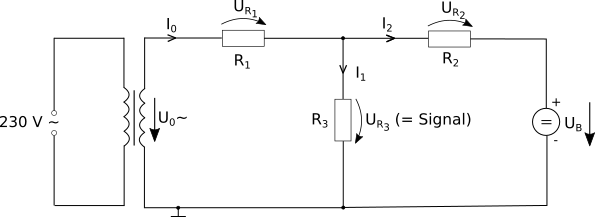

In [1]:
from IPython.display import Image
Image(filename='circuit.png') 

## Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import plotting
%matplotlib inline

## Parameters

In [36]:
fs = 2428.35  # sampling frequency 
bit = 10  # arduino resolution
resolution = 5 / 2**10  # arduino range: 0...5 Volt
dc_offset = 2.45  # Volts

## Read Data from A/D Converter

In [37]:
# 1) convert ADC value to a voltage level
# 2) remove DC offset
# 3) convert to 230 V level
data = (np.genfromtxt('analog_data.txt') * resolution - dc_offset) * 114

## Plot Time Domain

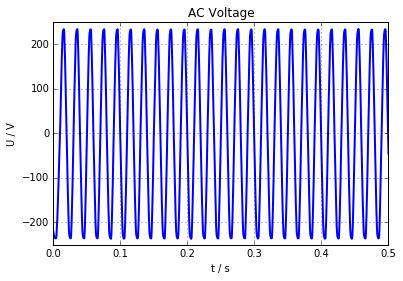

In [38]:
plotting.plot_time(data, fs)
plt.ylim([-250,250])
plt.xlim([0,0.5])
plt.ylabel("U / V")
plt.title("AC Voltage");

## Plot Frequency Domain

In [39]:
maximum = np.max(data)

### linear and around 50 Hz

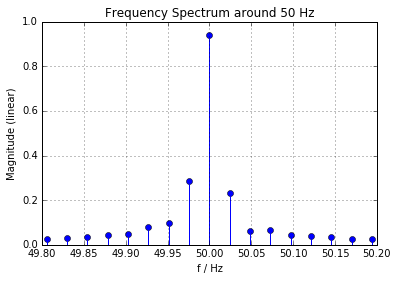

In [40]:
plotting.plot_freq(data[:100000] / maximum, fs, stem=True)
plt.xlim([49.8, 50.2])
plt.title("Frequency Spectrum around 50 Hz");

### linear with harmonics

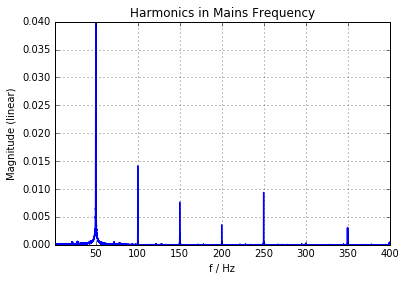

In [27]:
plotting.plot_freq(data / maximum, fs)
plt.ylim([0, 0.04])
plt.xlim([1, 400])
plt.title("Harmonics in Mains Frequency");

### dB with harmonics

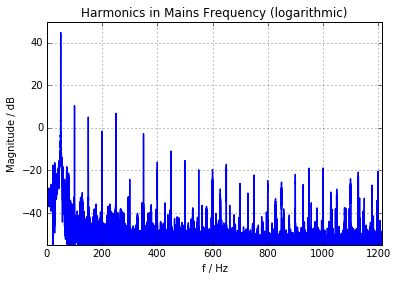

In [30]:
plotting.plot_freq(data, fs, scale='db')
plt.xlim([1, fs/2])
plt.ylim([-55, 50])
plt.title("Harmonics in Mains Frequency (logarithmic)");